# An analysis of the sales data of electronic products in USA.

Importing the required libraries and the database for our analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from itertools import combinations
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data-for-eda/Sales_Data/Sales_December_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_November_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_July_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_October_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_March_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_February_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_May_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_April_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_September_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_June_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_January_2019.csv
/kaggle/input/sales-data-for-eda/Sales_Data/Sales_August_2019.csv


# Merge 12 months of sales data into a single csv file**

In [2]:
# Create a list of data files from data dir.also import os
data_files_list = [file for file in os.listdir('../input/sales-data-for-eda/Sales_Data/')]

# Create an empty DF
combined_data = pd.DataFrame()

# read each file in df and then concatenate with empty DF

for file in data_files_list:
    temp_df = pd.read_csv('../input/sales-data-for-eda/Sales_Data/'+file)
    combined_data = pd.concat([combined_data, temp_df])

combined_data.to_csv('all_data_combined.csv', index=False)

#data combined. Now read the combined file directly and use for analysis
all_data = pd.read_csv('all_data_combined.csv')


# Data cleaning and formatting

In [3]:
# find rows with NaN across df
# nan_df = all_data[all_data.isna().any(axis=1)]
# print(nan_df.head())
# Drop nan from nan_df
all_data = all_data.dropna(how='all')

# #Check for error with unexpected field name starting 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
# print(temp_df.to_string())

# Create a new column called Month, extract month number from Order Data and convert Month to int.
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')

# Change column type of price and quantity to integer and float respectively
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #To int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #To float
# print(all_data.head().to_string())


# Q. What is the best month for sale? How much was earned?

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


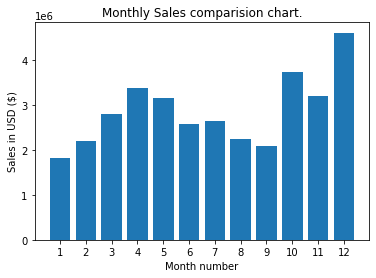

A: December is the best month for sales, followed by October. The reason could be festive sales where the ecommerce industry witnesses a major sales boost.


In [4]:
#Create column to calculate sales - quantity * price
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# print(all_data.head().to_string())

sales_sum = all_data.groupby('Month').sum()
print(sales_sum)

# Create bar chart using matplotlib and format
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, sales_sum['Sales'])
plt.title('Monthly Sales comparision chart.')
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD ($)')
plt.show()
print('A: December is the best month for sales, followed by October. The reason could be festive sales where the ecommerce industry witnesses a major sales boost.')

# Q. Which city has the highest sales?

                      Quantity Ordered    Price Each   Month         Sales
City                                                                      
 Atlanta (GA)                    16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                     11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                     22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                     16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)                33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)              27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                    2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                   11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)              50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                    16553  2.733296e+06  104941  2.747755e+06


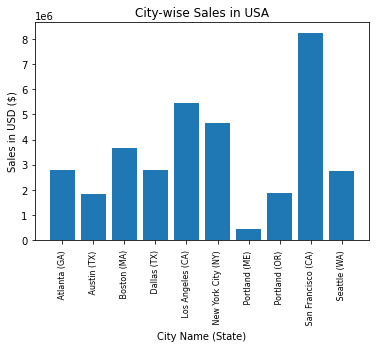

A: San Francisco has the highest sales in US, followed by Los Angeles.


In [5]:
# create a city column by extracting city name off the address

# City Splitter func definition
def get_city(address):
    return address.split(',')[1]

# State Splitter to avoid issues with multiple cities with same names
def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Two option to split. Lambda function or lambda function call
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)}) ")  #F string variation

#City sales group by
citywise_sales = all_data.groupby('City').sum()
print(citywise_sales.to_string())

# Create City wise sales bar chart
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]  #List comprehension to match order of data
plt.bar(cities, citywise_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City Name (State)')
plt.ylabel('Sales in USD ($)')
plt.title('City-wise Sales in USA')
plt.show()

print('A: San Francisco has the highest sales in US, followed by Los Angeles.')

# Q. What time should we display advertisements to maximise for product purchase?

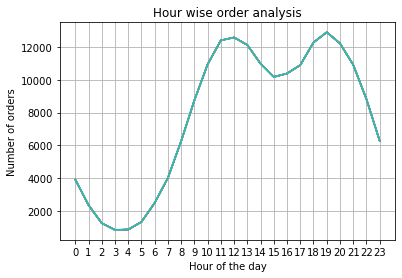

A: 12pm and 7pm is probably the best time to advertise to maximise product purchase.


In [6]:
#Covert data to date/time object using data-time functions by making hour and minute columns
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #Create date/time object
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

hours = [hour for hour, df in all_data.groupby('Hour')]  #List comprehension to match order of data #Create list of 24 hours for analysis
plt.plot(hours, all_data.groupby(['Hour']).count()) #count the orders each hours of the day
plt.xticks(hours)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.grid()
plt.title('Hour wise order analysis')
plt.show()

print('A: 12pm and 7pm is probably the best time to advertise to maximise product purchase.')
# print(all_data.head().to_string())


# Q. What products are most often sold together?

In [7]:
#Create a new df with duplicated order. Duplicated order indicates order with two or more products. keep=False to use all occurances
combo_df = all_data[all_data['Order Date'].duplicated(keep=False)]
#Create a new column, group by orderid and combine products in a single cell comma separated
combo_df['Best Combo'] = combo_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#Remove duplicated entry and show only orderid and combo column results
combo_df = combo_df[['Order ID', 'Best Combo']].drop_duplicates()
# print(combo_df.head())

#Count the occurances
from itertools import combinations
from collections import Counter

#count the combination of 2 products using the above mentioned libs.
count = Counter()
#iterate through each cell, split products in a list and count
for row in combo_df['Best Combo']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #group of 2. Change to 3 for group of 3s

#Most common occurance
for key, value in count.most_common(10):
    print(key, value)
    
print('\n\nA: iPhone along with Lightning Charging Cable is best selling product combination.')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


A: iPhone along with Lightning Charging Cable is best selling product combination.


# Q. What product sold the most? Why?

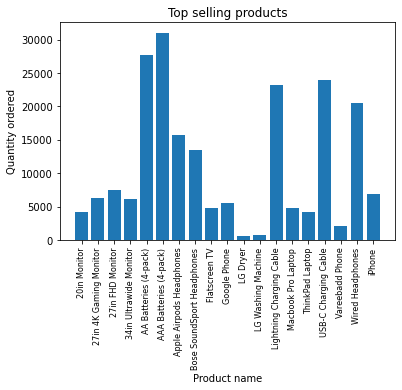

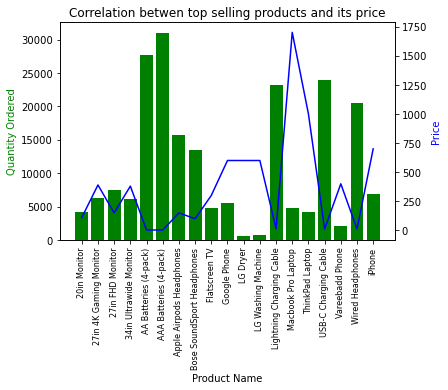

A: The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.


In [8]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product name')
plt.ylabel('Quantity ordered')
plt.title('Top selling products')
plt.show()

#Find price of the best selling products
prices = all_data.groupby('Product').mean()['Price Each']

#Find corelation between best products and their price
#Add the second axis at y for price comparision in the same graph
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-') #Second axis on y

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.title.set_text('Correlation betwen top selling products and its price')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()
print("A: The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.")

*Credit to Keith Galli for sharing such a cool project tutorial!*